In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

df = pd.read_csv('rice.csv')
df

,Soil_Moisture,Temperature,Humidity,Time,Status
0,54,22,70,21,1
1,12,20,40,104,0
2,34,26,35,62,1
3,7,44,44,93,0
4,50,38,23,92,0
...,...,...,...,...,...
99995,74,3,29,83,0
99996,58,10,46,82,0
99997,4,35,39,17,1
99998,83,36,56,15,0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status'])
y = df['Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [3]:
#sns.pairplot(df)

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import naive_bayes
from sklearn import ensemble

In [5]:
clf = KNeighborsClassifier(n_neighbors=4)

#clf = naive_bayes.GaussianNB()

#clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)

#clf = svm.LinearSVC(random_state=0, tol=1e-5, max_iter=1000000)

In [6]:
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=3):
    clf.fit(X_train, y_train)

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [8]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

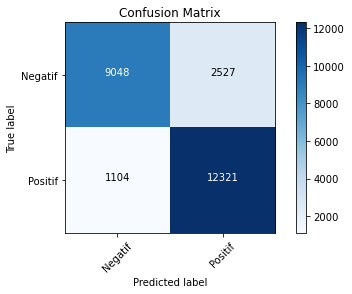

In [9]:
cm_plot_labels = ['Negatif', 'Positif']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [10]:
print ("Hasil Klasifikasi: \n", metrics.classification_report(y_test, y_pred, zero_division=1))

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83     11575
           1       0.83      0.92      0.87     13425

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [11]:
Xnew = [[50,30,70,20]]
Ynew = clf.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], Ynew[i]))

X=[50, 30, 70, 20], Predicted=1
